In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical  # This is the correct import
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
# import data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

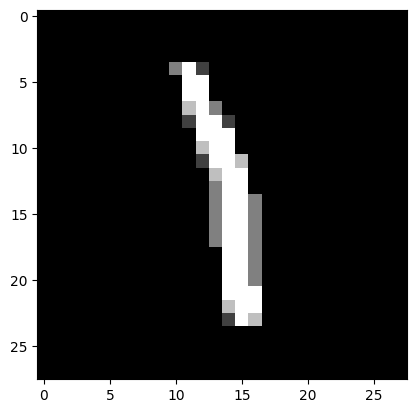

In [22]:
# first, let‘s generate a random number with numpy random, so everytime we get a different image
random_nr = np.random.randint(0, 60000)

# now, let‘s use imshow() to visualize the random number from our train dataset
plt.imshow(X_train[random_nr], cmap="gray");

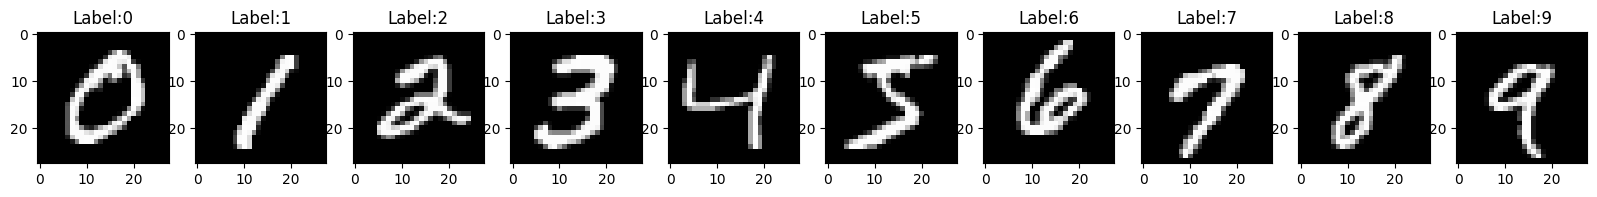

In [23]:
# Let‘s visualize one example per each digit using a for loop and matplotlib subplot
num_classes = 10

# Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 row, 10 columns (num_classes)

# Loop through 10 classes from train dataset and add labels from test dataset
for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

In [24]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

AttributeError: module 'keras.utils' has no attribute 'np_utils'